## Plot bandwidth CDF

In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from conf_dict_util import conf_to_dict, dict_to_conf
from qoe_utils import make_bandwidth_series, get_QoE_rr, get_QoE_delay, get_QoE_losses

In [2]:
from matplotlib import rcParams
#IEEE Times New Roman (Nimbus Roman)
rcParams['text.latex.preamble'] = r"\usepackage{mathptmx}"

#Latex in general
rcParams['font.family'] = "serif"
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

In [3]:
traces = [
'WIRED_200kbps',
'WIRED_900kbps',
'WIRED_35mbps',
'4G_500kbps',
'4G_700kbps',
'4G_3mbps',
'5G_12mbps',
'5G_13mbps',
'trace_300k']
step_time = 200

In [41]:
lolo_capacities = []
std_cap = []
durations = []
for trace in traces:
    trace_path = "../" + "traces/" + trace + ".json"

    capacities = make_bandwidth_series(trace_path, step_time)
    duration = (capacities.index[-1] - capacities.index[0]).total_seconds()
    print(trace, duration, "s")
    print(capacities)
    std_cap.append(capacities.std())
    lolo_capacities.append(list(capacities))
    durations.append(duration)

WIRED_200kbps 222.8 s
1970-01-01 00:00:00.000    236
1970-01-01 00:00:00.200    236
1970-01-01 00:00:00.400    236
1970-01-01 00:00:00.600    246
1970-01-01 00:00:00.800    246
                          ... 
1970-01-01 00:03:42.000     22
1970-01-01 00:03:42.200     22
1970-01-01 00:03:42.400     22
1970-01-01 00:03:42.600     22
1970-01-01 00:03:42.800     22
Freq: 200L, Length: 1115, dtype: int64
WIRED_900kbps 57.6 s
1970-01-01 00:00:00.000     790
1970-01-01 00:00:00.200     790
1970-01-01 00:00:00.400     790
1970-01-01 00:00:00.600     900
1970-01-01 00:00:00.800     900
                           ... 
1970-01-01 00:00:56.800     869
1970-01-01 00:00:57.000     869
1970-01-01 00:00:57.200     869
1970-01-01 00:00:57.400    1051
1970-01-01 00:00:57.600    1051
Freq: 200L, Length: 289, dtype: int64
WIRED_35mbps 61.2 s
1970-01-01 00:00:00.000         0
1970-01-01 00:00:00.200         0
1970-01-01 00:00:00.400     54600
1970-01-01 00:00:00.600    130000
1970-01-01 00:00:00.800    1010

In [32]:
pd.Series(durations).mean()

88.51111111111112

In [40]:
std_cap

[62.949828827029506,
 99.39340325751554,
 3212091.5917504495,
 201.57417155620453,
 255.30793720413266,
 460242.1088893621,
 4660.145181182325,
 1622620.2283722297,
 0.0]

In [5]:
qoe = [86.46932081217852,
 94.46026348796617,
 62.07838234136955,
 86.69129895603862,
 85.40900904005426,
 87.00677524473494,
 74.04304749601823,
 64.34435097745765,
 87.14904733496331]

(-10.0, 300.0)

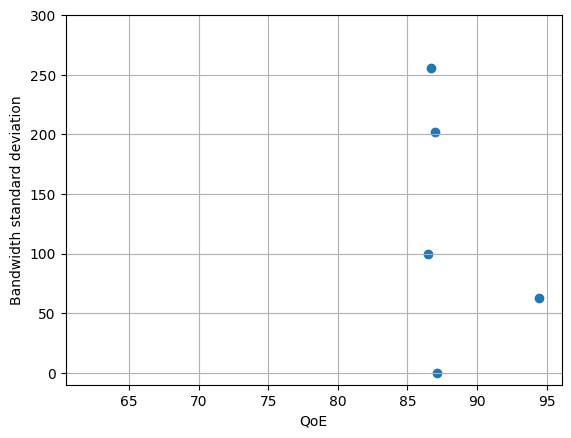

In [6]:
plt.scatter(qoe, std_cap)
plt.xlabel("QoE")
plt.ylabel("Bandwidth standard deviation")
plt.grid()
plt.ylim(-10,300)
# plt.yscale("log")

In [5]:
import itertools

In [6]:
trace_dict = {
'WIRED_900kbps': "Wired 900kbps",
 'WIRED_200kbps': "Wired 200kbps",
 'WIRED_35mbps': "Wired 35Mbps",
 '4G_700kbps': "4G 700kbps",
 '4G_3mbps': "4G 3Mbps",
 '4G_500kbps': "4G 500kbps",
 '5G_12mbps': "5G 12Mbps",
 '5G_13mbps': "5G 13Mbps",
 'trace_300k': "300kbps"
}

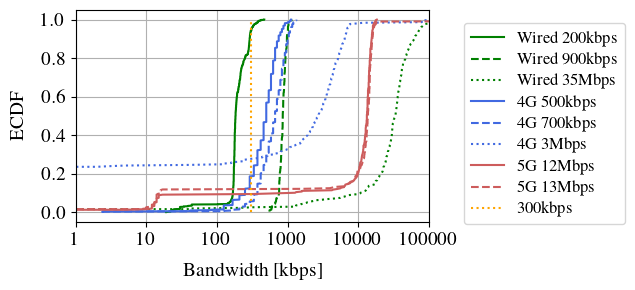

In [55]:
list_cdf_data = lolo_capacities

figsize = (8, 3)
labelspacing = 0.2
legend_fontsize = 12
fontsize = 14
x_label = "Bandwidth [kbps]"

# colors_dataset = ["#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
colors_dataset = ["indianred", "teal", "lightgreen"]
cd = itertools.cycle(colors_dataset)

fig, ax = plt.subplots(figsize=figsize)
ax.tick_params(axis='both', which='minor',
               length=0,
               # direction='in'
              )
ax.tick_params(axis='both', which='major',
               #length=0,
               # direction='in'
              )
c = 0
for i in range(len(list_cdf_data)):
    if c%3 == 0:
        ls = itertools.cycle(linestyles)
    c+=1
    data = list_cdf_data[i]
    label = trace_dict[traces[i]]
    cdfx = np.sort(data)
    cdfy = np.linspace(1 / len(data), 1.0, len(data))
    if "Wired" in label:
        color = "green"
    elif "4G" in label:
        color = "royalblue"
    elif "5G" in label:
        color = "indianred"
    elif "300kbps" in label:
        color = "orange"

    p = plt.plot(cdfx, cdfy,
                 linestyle=next(ls),
                 label=label,
                 color = color
                )

# plt.xticks(np.arange(0,26,2))
plt.xscale('log')
plt.yticks(np.arange(0,1.1,0.2))
ax.tick_params(axis='y', labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)

plt.xlabel(x_label, fontsize=fontsize, labelpad=10)
plt.xlim(1,100000)
plt.ylabel('ECDF', fontsize=fontsize, labelpad=10)
plt.grid()

plt.xticks([1, 10, 100, 1000, 10000, 100000], [1, 10, 100, 1000, 10000, 100000])

plt.legend(prop={'size': legend_fontsize}, labelspacing=labelspacing, bbox_to_anchor=(1.58,0.98))
plt.tight_layout()

plt.savefig("plots/bandwidth_all_traces.pdf",  bbox_inches='tight')

In [16]:
ax.get_xticks()

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])